<a href="https://colab.research.google.com/github/G736saini/sainiking/blob/main/Copy_of_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from PIL import Image # Importing the Image module from PIL (Python Imaging Library) to handle image processing tasks
from skimage.io import imread, imshow, show # Importing imread, imshow, and show functions from skimage.io for reading and displaying
import scipy.fftpack as fp # Importing the Fast Fourier Transform (FFT) module from SciPy for frequency domain processing
from scipy import ndimage, misc, signal# Importing various image processing functions from SciPy
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray # Importing rgb2gray to convert RGB images to grayscale
from skimage.transform import rescale # Importing rescale to resize images
import matplotlib.pylab as pylab # Importing pylab for visualization and plotting
import numpy as np
import numpy.fft # Importing timeit to measure execution time of code snippets
# Importing timeit to measure execution time of code snippets
import timeit

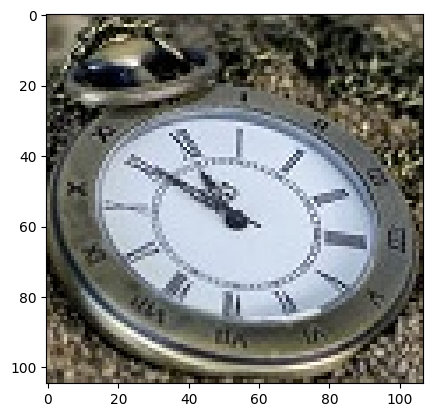

(<matplotlib.image.AxesImage at 0x7fb7f77f0510>, None)

In [ ]:
im = Image.open("images/clock.jpg") # the original small clock image
pylab.imshow(im), pylab.show()# Display the image using pylab's imshow function
# Show the plotted image


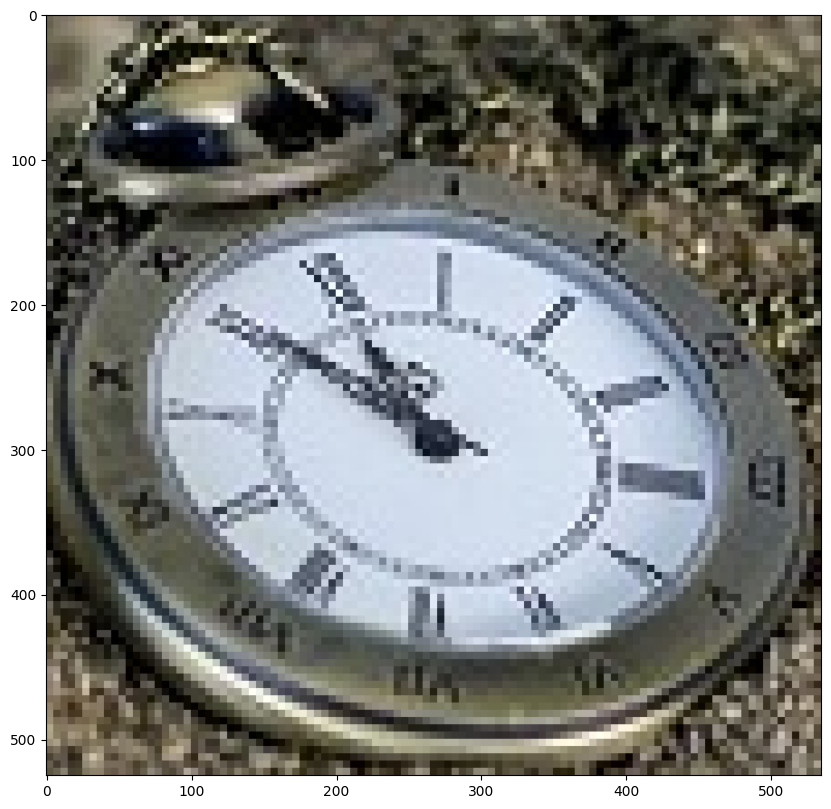

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [ ]:
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) # nearest neighbor interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show() # Create a new figure with a specified size of 10x10 inches

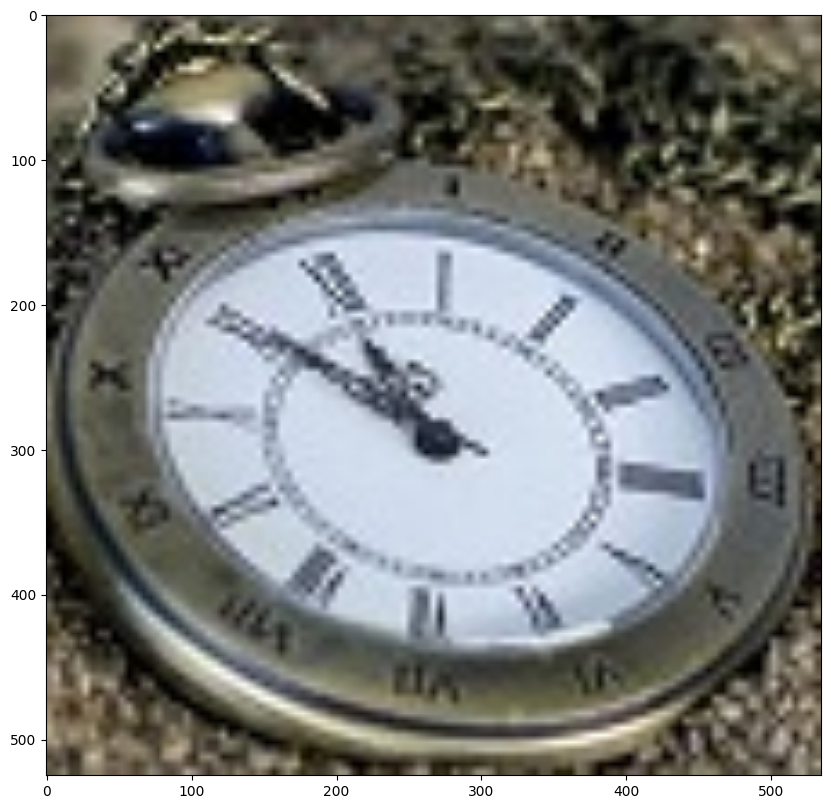

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [ ]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) # up-sample with bi-linear interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

Down-sampling

In [ ]:
im = Image.open("images/tajmahal.jpg")# Open the image file "tajmahal.jpg" from the "images" directory using PIL

# Display the image in the default image viewer
im.show()

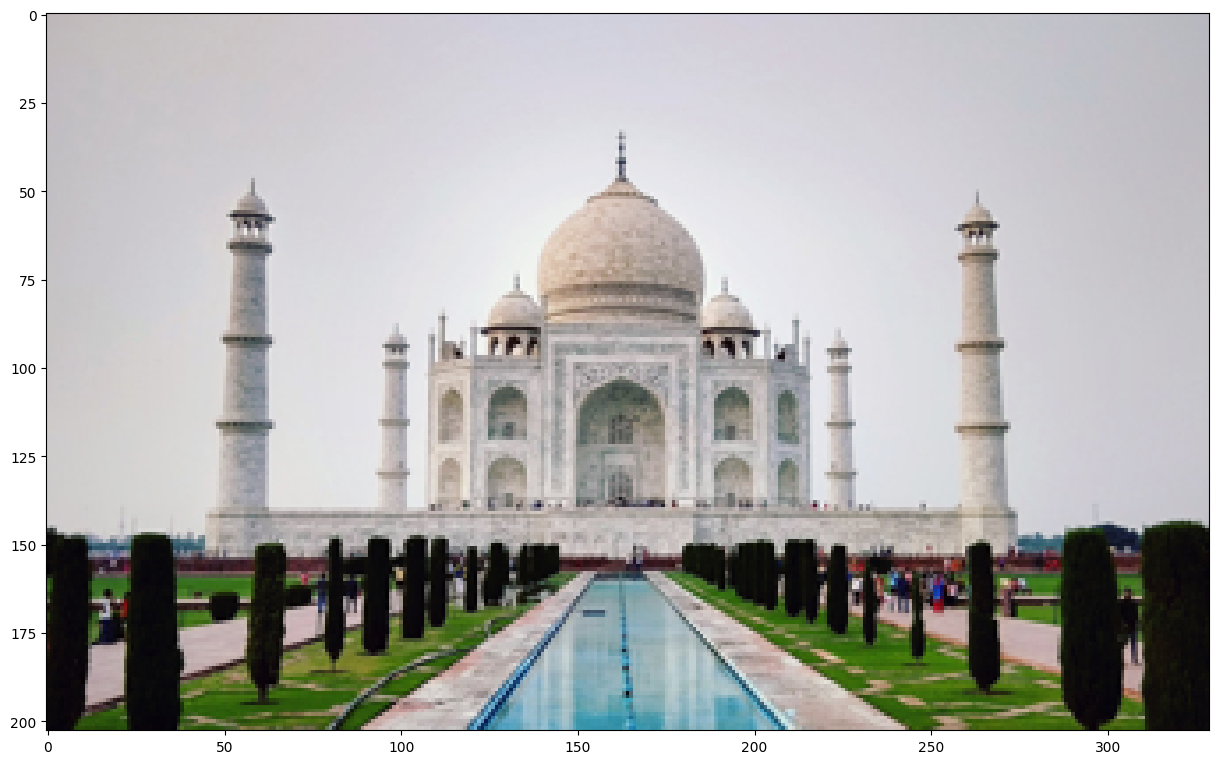

(<Figure size 1500x1000 with 1 Axes>,
 None)

In [ ]:
im = im.resize((im.width//5, im.height//5)) # Resize the image to 1/5th of its original width and height while maintaining aspect ratio

pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()

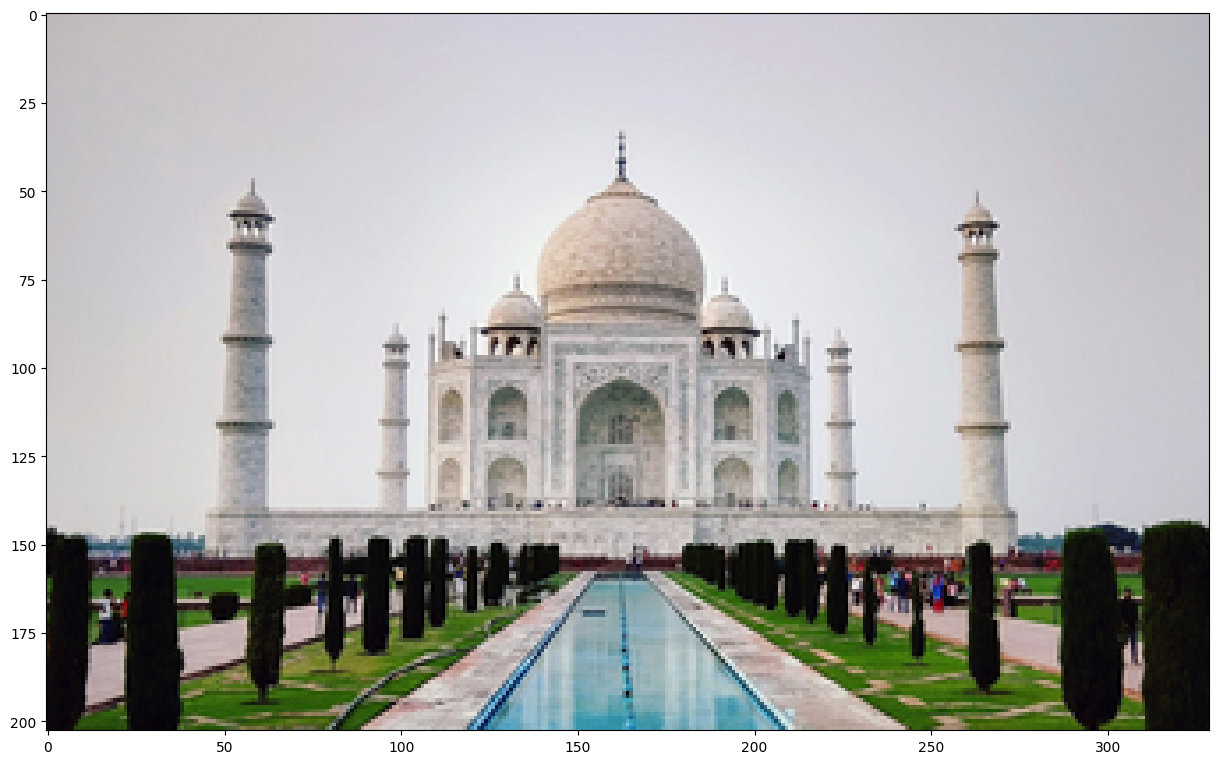

(<Figure size 1500x1000 with 1 Axes>,
 None)

In [ ]:
im = Image.open("images/tajmahal.jpg")
im = im.resize((im.width//5, im.height//5), Image.LANCZOS)#LANCZOS is the exact same algorithm that ANTIALIAS referred to
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()

In [ ]:
def signaltonoise(a, axis=0, ddof=0):# Define a function to calculate the signal-to-noise ratio (SNR)
    a = np.asanyarray(a) # Convert input array 'a' to a NumPy array if it isn't already
    m = a.mean(axis)  # Compute the mean of 'a' along the specified axis
    sd = a.std(axis=axis, ddof=ddof)  # Compute the standard deviation of 'a' along the specified axis
    return np.where(sd == 0, 0, m/sd)   # Return the ratio of mean to standard deviation, handling cases where standard deviation is zero

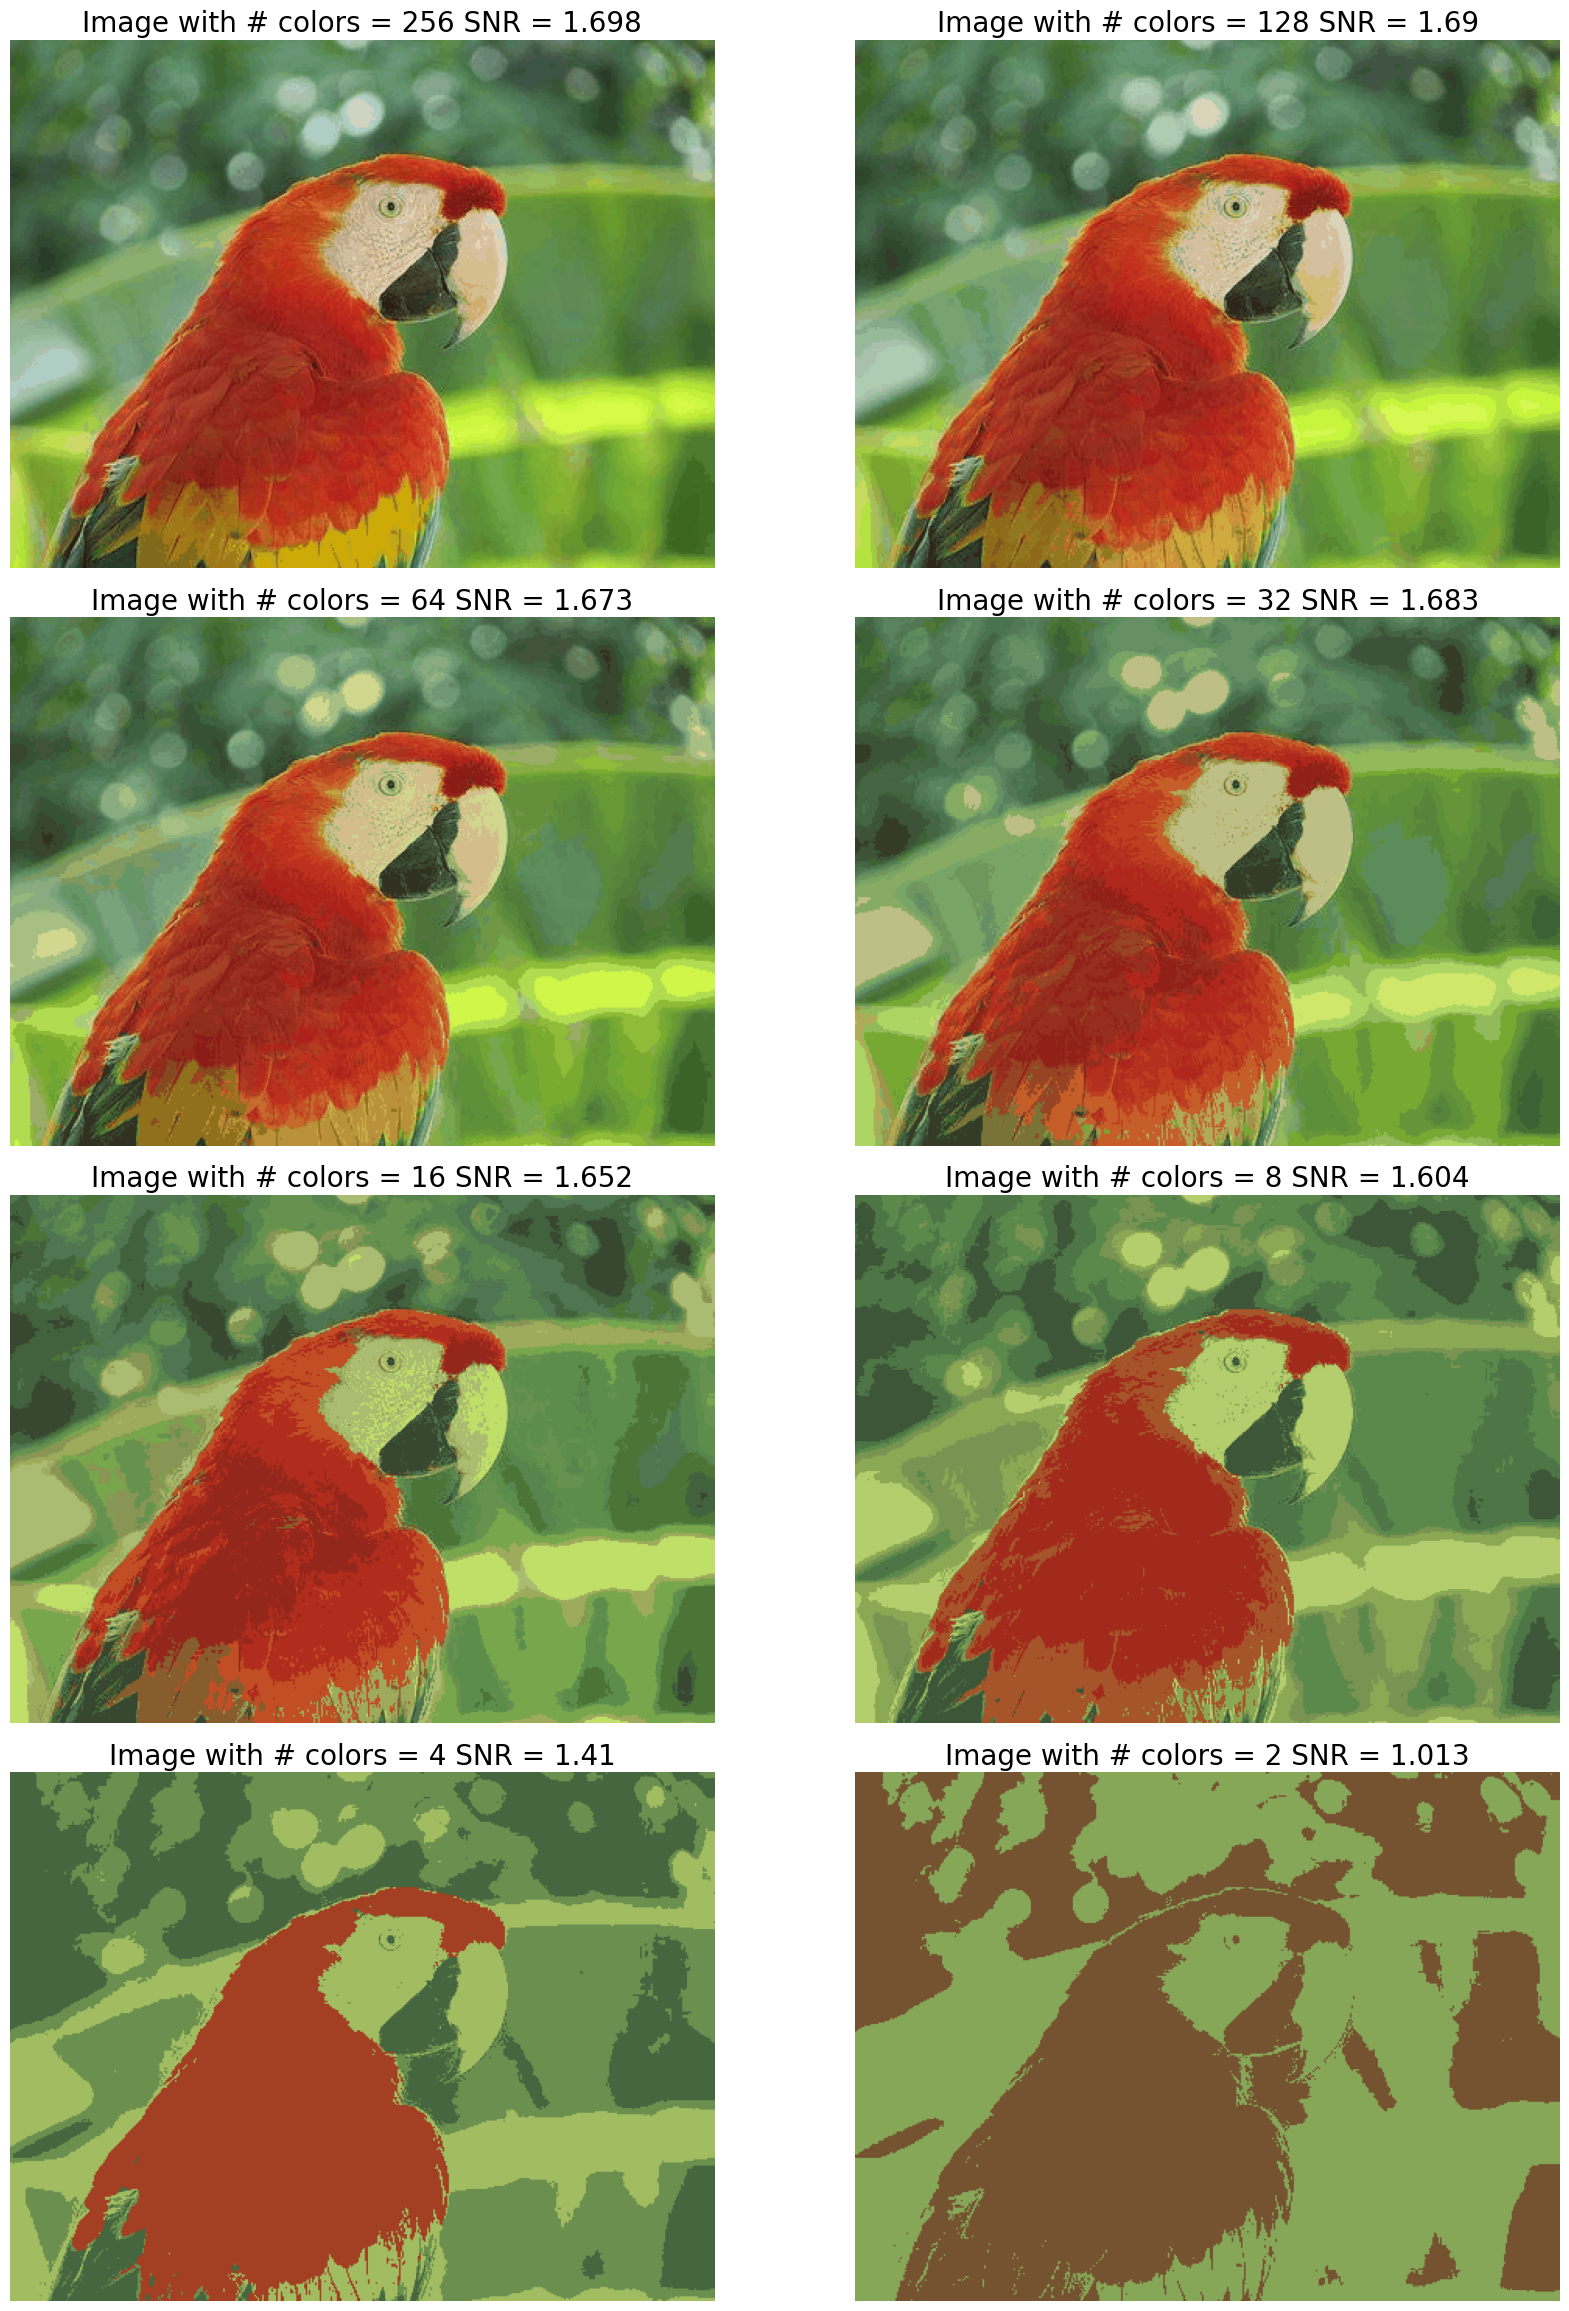

In [ ]:
im = Image.open('images/parrot.jpg')# Open the image file "parrot.jpg" from the "images" directory using PIL
pylab.figure(figsize=(20,30))# Create a new figure with a specified size of 20x30 inches for plotting
num_colors_list = [1 << n for n in range(8,0,-1)]# Generate a list of color quantization levels: 256, 128, 64, ..., 2
# Initialize an empty list to store signal-to-noise ratio (SNR) values
snr_list = []
i = 1
for num_colors in num_colors_list:# Loop through different color levels to generate quantized images
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)    # Convert the image to a palette-based image with 'num_colors' using adaptive quantization
    pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off') # Create a subplot in a 4x2 grid and display the quantized image

    snr_list.append(signaltonoise(im1, axis=None)) # Compute the signal-to-noise ratio (SNR) of the quantized image and store it
         # Set the title of the subplot to show the number of colors and corresponding SNR value
    pylab.title('Image with # colors = ' + str(num_colors) + ' SNR = ' +
    str(np.round(snr_list[i-1],3)), size=20)
    i += 1 # Increment the subplot index counter
pylab.subplots_adjust(wspace=0.2, hspace=0)# Adjust spacing between subplots to improve layout
pylab.show()

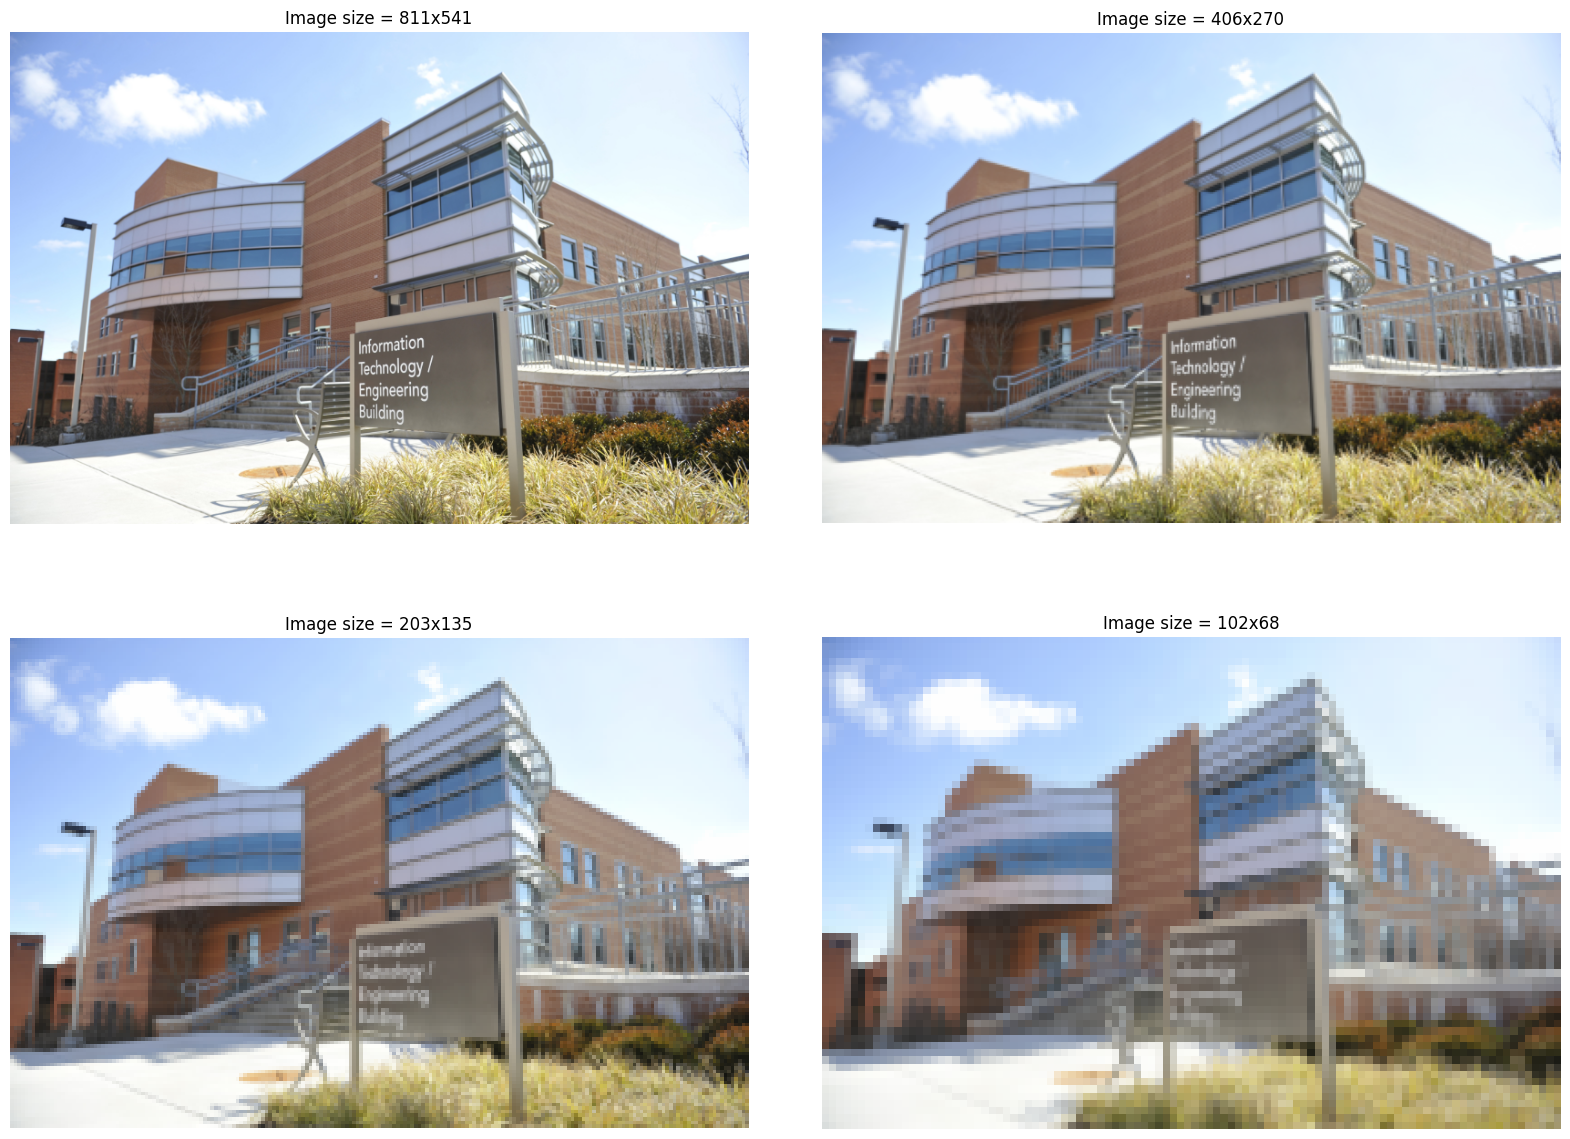

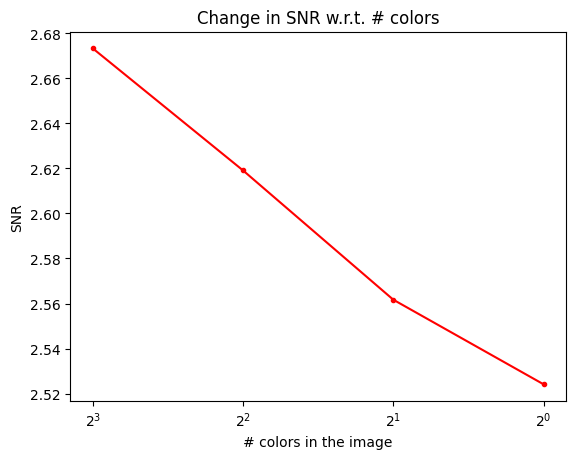

In [ ]:
# signaltonise function has been removed from scipy.stats
# multichannel parameter has been deprecated in new version   , use channel_axis instead of multichannel
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import rescale
import numpy as np

# Function to calculate Signal-to-Noise Ratio (SNR)
def calculate_snr(image):

    mean_signal = np.mean(image)  # Compute mean of the image (signal strength)
    std_noise = np.std(image)  # Compute standard deviation (noise level)
    return mean_signal / std_noise  # SNR formula: mean / standard deviation

# Load image from specified path
im = imread('/content/images/umbc.png')

# Ensure the image has the correct shape for processing
if im.ndim == 2:  # If the image is grayscale
    im1 = im.copy()
elif im.shape[2] == 2:  # If the image has only 2 channels
    # Add a third channel filled with zeros to make it a valid RGB image
    im1 = np.dstack([im, np.zeros_like(im[:, :, 0])])
else:  # If the image is already RGB or RGBA
    im1 = im.copy()

# Set up figure for displaying images
plt.figure(figsize=(20, 15))
snr_list = []  # List to store SNR values

# Loop to display images at different scales
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(im1, cmap='gray' if im1.ndim == 2 else None)  # Display image
    plt.axis('off')  # Hide axes
    plt.title(f'Image size = {im1.shape[1]}x{im1.shape[0]}')  # Show image size

    # Calculate SNR and store it
    snr = calculate_snr(im1)
    snr_list.append(snr)

    # Downscale image by 50% for next iteration
    im1 = rescale(im1, scale=0.5, channel_axis=-1, anti_aliasing=True)

plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust subplot spacing
plt.show()  # Show all images

# Example plot of SNR vs. number of colors in the image
num_colors_list = [2**i for i in range(4)]  # Example values for number of colors
plt.plot(num_colors_list, snr_list, 'r.-')  # Plot SNR values

# Set labels and title for the graph
plt.xlabel('# colors in the image')
plt.ylabel('SNR')
plt.title('Change in SNR w.r.t. # colors')
plt.xscale('log', base=2)  # Logarithmic scale with base 2
plt.gca().invert_xaxis()  # Reverse x-axis for better visualization
plt.show()  # Display the SNR plot
